In [ ]:
from google.colab import drive
import os
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/CS3244 Project')
os.chdir('Dataset/')

# Data Cleaning

Columns of Application Record

* ID	Client number
* CODE_GENDER	Gender
* FLAG_OWN_CAR	Is there a car
* FLAG_OWN_REALTY	Is there a property
* CNT_CHILDREN	Number of children
* AMT_INCOME_TOTAL	Annual income
* NAME_INCOME_TYPE	Income category
* NAME_EDUCATION_TYPE	Education level
* NAME_FAMILY_STATUS	Marital status
* NAME_HOUSING_TYPE	Way of living
* DAYS_BIRTH	Birthday	Count backwards from current day (0), -1 means yesterday
* DAYS_EMPLOYED	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
* FLAG_MOBIL	Is there a mobile phone
* FLAG_WORK_PHONE	Is there a work phone
* FLAG_PHONE	Is there a phone
* FLAG_EMAIL	Is there an email
* OCCUPATION_TYPE	Occupation
* CNT_FAM_MEMBERS	Family size

Columns of Credit Record

* ID	Client number
* MONTHS_BALANCE	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* STATUS	Status
0: 1-29 days past due,
1: 30-59 days past due,
2: 60-89 days overdue,
3: 90-119 days overdue,
4: 120-149 days overdue,
5: Overdue or bad debts, write-offs for more than 150 days,
C: paid off that month,
X: No loan for the month,
N:No credit records (IDs that are in App records but not in credit records)

In [ ]:
application_record_df = pd.read_csv('application_record.csv')
credit_record_df = pd.read_csv('credit_record.csv')

### Checking for null values

In [ ]:
# by running through all the columns in the application_record_df, we can see that only OCCUPATION_TYPE has NA rows.
app_col_names = application_record_df.columns
cred_col_names = credit_record_df.columns

for col in app_col_names:
  x=application_record_df[application_record_df[col].isna()]
  if len(x.index) >=1:
    print(col)

application_record_df['OCCUPATION_TYPE'] = application_record_df['OCCUPATION_TYPE'].fillna('No Occupation Stated')

OCCUPATION_TYPE


In [ ]:
# we check for the NA rows in credit records, there are none
credit_record_df[credit_record_df.isna().any(axis=1)]

,ID,MONTHS_BALANCE,STATUS


In [ ]:
application_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,No Occupation Stated,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,No Occupation Stated,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
application_record_df['ID'].nunique()

438510

In [ ]:
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit_record_df['ID'].nunique()

45985

## Application records

### Check for duplicate IDs

In [ ]:
# Identify all duplicate IDs (including their first occurrence)
duplicate_ids = application_record_df.duplicated('ID', keep='first')
# Print the count of duplicates
print(f"Count of duplicate IDs: {duplicate_ids.sum()}")

duplicate_ids = application_record_df.duplicated('ID', keep=False)
duplicates_df = application_record_df[duplicate_ids].sort_values('ID')

Count of duplicate IDs: 47


In [ ]:
# check if duplicated IDs exist in credits_df
credit_record_ids = set(credit_record_df['ID'])
duplicate_ids_set = set(duplicate_ids)

intersection_ids = credit_record_ids.intersection(duplicate_ids_set)
count_intersection = len(intersection_ids)
print(f"Number of duplicate IDs present in credit_record_df: {count_intersection}")

Number of duplicate IDs present in credit_record_df: 0


The duplicated IDs don't exist in credit_records so we can ignore them


In [ ]:
# filter only those with existing credit records
appRec_withCredit_df = application_record_df[application_record_df['ID'].isin(credit_record_ids)]

### Handle age and employment status

In [ ]:
# Convert DAYS_BIRTH from days to years
application_record_df['AGE'] = application_record_df['DAYS_BIRTH'].abs() / 365

# Create a flag for employment status
application_record_df['EMPLOYED'] = application_record_df['DAYS_EMPLOYED'] < 0

# Convert DAYS_EMPLOYED to years, and handle positive values (unemployed)
application_record_df['YEARS_EMPLOYED'] = application_record_df['DAYS_EMPLOYED'].apply(lambda x: abs(x)/365 if x < 0 else 0)

application_record_df['YEARS_UNEMPLOYED'] = application_record_df['DAYS_EMPLOYED'].apply(lambda x: abs(x)/365 if x > 0 else 0)

### Categorical variables

In [ ]:
# Convert categorical variables to 'category' data type
categorical_columns = ['CODE_GENDER', 'NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
for col in categorical_columns:
    application_record_df[col] = application_record_df[col].astype('category')

In [ ]:
application_record_df['NAME_EDUCATION_TYPE'] = application_record_df['NAME_EDUCATION_TYPE'].replace({'Academic degree': 'Higher education'})
application_record_df['NAME_FAMILY_STATUS'] = application_record_df['NAME_FAMILY_STATUS'].replace({'Civil marriage': 'Married'})

In [ ]:
import numpy as np

application_record_df[application_record_df['DAYS_EMPLOYED']> 36500]

# Create a new column to flag long-term unemployment or retirement
application_record_df['LONG_TERM_UNEMPLOYED'] = np.where(application_record_df['DAYS_EMPLOYED'] > 36500, 1, 0)
application_record_df['DAYS_EMPLOYED'] = application_record_df['DAYS_EMPLOYED'].mask(application_record_df['DAYS_EMPLOYED'] > 36500, np.nan)

In [ ]:
application_record_df['DAYS_EMPLOYED']

0        -4542.0
1        -4542.0
2        -1134.0
3        -3051.0
4        -3051.0
           ...  
438552       NaN
438553   -3007.0
438554    -372.0
438555       NaN
438556   -1201.0
Name: DAYS_EMPLOYED, Length: 438557, dtype: float64

## Credit records

In [ ]:
unique_ids_in_credit_records = set(credit_record_df['ID']) - set(application_record_df['ID'])
print(f"Number of unique IDs in credit records without application records: {len(unique_ids_in_credit_records)}")

Number of unique IDs in credit records without application records: 9528


In [ ]:
unique_ids_in_credit_records = set(application_record_df['ID']) - set(credit_record_df['ID'])
print(f"Number of unique IDs in credit records without application records: {len(unique_ids_in_credit_records)}")

Number of unique IDs in credit records without application records: 402053


In [ ]:
intersection_ids = set(credit_record_df['ID']).intersection(set(application_record_df['ID']))
print(f"Number of IDs present in both datasets: {len(intersection_ids)}")

Number of IDs present in both datasets: 36457


# Vintage Analysis

In [ ]:
df_credit_records = credit_record_df

In [ ]:
credit_grouped = df_credit_records.groupby('ID')

pivot_tb = df_credit_records.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['start_month'] = credit_grouped['MONTHS_BALANCE'].min() # earliest start of loan
pivot_tb['latest_month'] = credit_grouped['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'start_month', 'latest_month']]
pivot_tb['window'] = pivot_tb['latest_month'] - pivot_tb['start_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)
pivot_tb

MONTHS_BALANCE,ID,start_month,latest_month,window
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [ ]:
import numpy as np

# group all by ID
credit_grouped = df_credit_records.groupby('ID')

pivot_tb = df_credit_records.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['start_month'] = credit_grouped['MONTHS_BALANCE'].min() # earliest start of loan
pivot_tb['latest_month'] = credit_grouped['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'start_month', 'latest_month']]
# window for each cust iis the earliest start and latest end date
pivot_tb['window'] = pivot_tb['latest_month'] - pivot_tb['start_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)

df_credit_records_new = pd.merge(df_credit_records, pivot_tb, on = 'ID', how = 'left') # join calculated information

# credit worthiness from status
df_credit_records_new['status'] = np.where((df_credit_records_new['STATUS'] == '2') | (df_credit_records_new['STATUS'] == '3' )| (df_credit_records_new['STATUS'] == '4' )| (df_credit_records_new['STATUS'] == '5'), 1, 0)
df_credit_records_new['status'] = df_credit_records_new['status'].astype(np.int8)

# month on book: # months customer has had an open account
df_credit_records_new['month_on_book'] = df_credit_records_new['MONTHS_BALANCE'] - df_credit_records_new['start_month']
df_credit_records_new.sort_values(by = ['ID','month_on_book'], inplace = True)

# count unique clients opened accounts in each month
count_clients = pivot_tb.groupby(['start_month']).agg({'ID': ['count']})
count_clients.reset_index(inplace = True)
count_clients.columns = ['start_month','sta_sum']


# vintage table
# count unique clients in each combination of (opening account date, age of account)
vint_tbl = df_credit_records_new.groupby(['start_month','month_on_book']).agg({'ID': ['count']})
vint_tbl.reset_index(inplace = True)
vint_tbl.columns = ['start_month','month_on_book','sta_sum']
vint_tbl['due_count'] = np.nan
vint_tbl = vint_tbl[['start_month','due_count', 'month_on_book']]

vint_tbl = pd.merge(vint_tbl, count_clients, on = ['start_month'], how = 'left') # join sta_sum colun to vintage table
vint_tbl


,start_month,due_count,month_on_book,sta_sum
0,-60,NaN,0,415
1,-60,NaN,1,415
2,-60,NaN,2,415
3,-60,NaN,3,415
4,-60,NaN,4,415
...,...,...,...,...
1886,-2,NaN,1,771
1887,-2,NaN,2,771
1888,-1,NaN,0,686
1889,-1,NaN,1,686


In [ ]:
# for every month an account was opened
for i in range (-60, 1):
    lst = []
    # loop through months it stays on book
    for j in range (0, 61):
        due_cust = list(df_credit_records_new[(df_credit_records_new['status'] == 1) &
                                              (df_credit_records_new['month_on_book'] == j) &
                                              (df_credit_records_new['start_month'] == i)]['ID'])

        lst.extend(due_cust)
        vint_tbl.loc[(vint_tbl['month_on_book'] == j) & (vint_tbl['start_month'] == i), 'due_count'] = len(set(lst))

# proportion of bad customers for each combi of account age, opening month
vint_tbl['sta_rate']  = vint_tbl['due_count'] / vint_tbl['sta_sum']
vint_tbl

### Vintage wide table
vintage_wide = vint_tbl.pivot(index = 'start_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide


month_on_book,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
start_month,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Vintage Line Chart

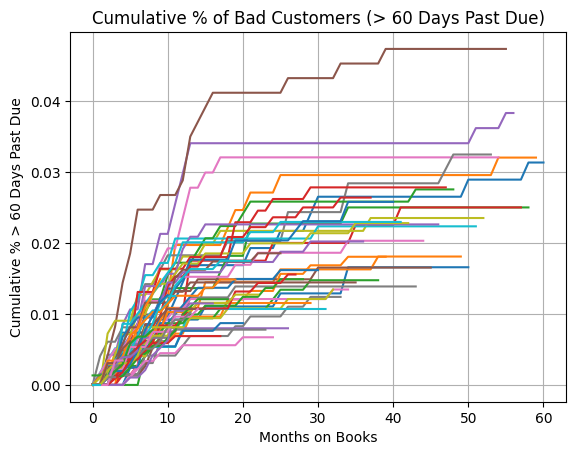

In [ ]:
# cumulative percentage of bad customers who are more than 60 days past due for different account ages ("Months on Books").
# shown for different start months
from matplotlib import pyplot as plt

# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
#plt.axvline(30)
#plt.axvline(25)b
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()


## Observe window analysis

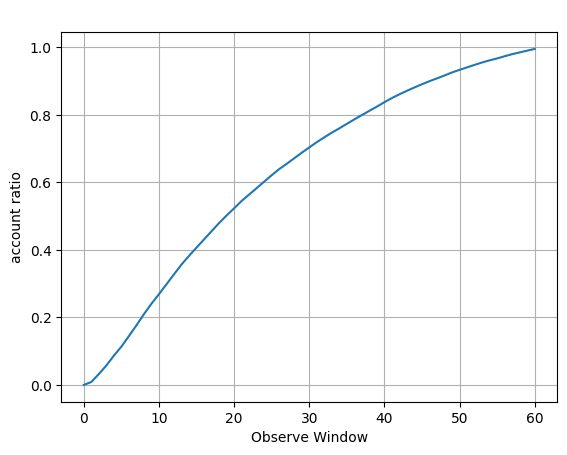

In [ ]:
lst = []
# for each observation window, calculate ratio of the number of unique accounts with an observation window less than "i" to the total number of unique accounts.
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)

pd.Series(lst).plot(legend = False, grid = True, title = ' ')
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.show()

# chart will help you understand how the number of accounts changes as the observation window lengthens, which can be valuable


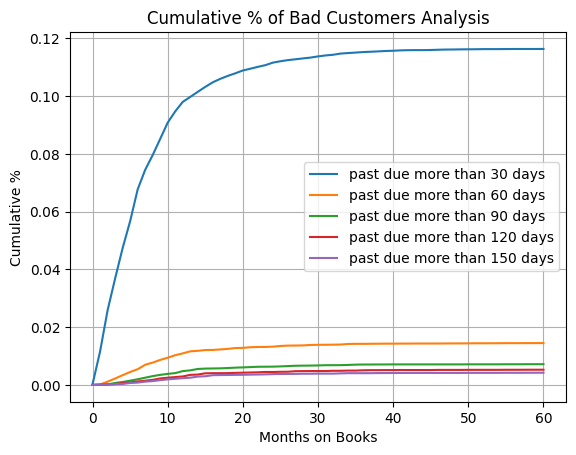

In [ ]:
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['start_month']
    # identify earliest month a customer went into delinquency
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    # for each observation window
    for i in range(0,61):
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        # calculates the ratio of customers in delinquency for each observation window
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum
    return obslst['rate']

# different categories of "bad" customers
command = "credit.loc[(credit['STATUS'] == '0') | (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan1 = calculate_observe(df_credit_records_new, command)
command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan30 = calculate_observe(df_credit_records_new, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(df_credit_records_new, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(df_credit_records_new, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(df_credit_records_new, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(df_credit_records_new, command)

obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })

obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

#  chart helps visualize how the proportion of bad customers changes
# over different observation windows, providing insights into
# how customer delinquency behavior evolves as their accounts age.



## Interpretation
Observe window is an important parameter that is needed to be determined. If the observe window is too short, the true behaviour might not surface yet, thus bringing noise to the data. Additionally, for cases such as credit risk data, seasonality is also another factor to be considered: year-end holiday season may generate higher balance and thus, more defaults in the following months as well. Hence, it is recommended for the default period to be at least a year (12 months) to minimise sample bias. Yet, if the observe window is too long, it may also result in being over-conservative and labelling every applicant as a bad applicant.

We can observe that most of the defaulting behaviour has surfaced past 20 months and the increasing trend has relatively stabilised at the 30 months mark. Hence, we have decided to pick 20 months as
our observe window and removed users with observe window less than 20 months.

## Past due ratio

In [ ]:
# bad customer ratio under different delinquency scenarios
def calculate_rate(pivot_tb, command):
    '''calculate bad customer rate
    '''
    df_credit_records['status'] = None
    exec(command) # execute input code
    # labels good(0) or bad(1) with defined range
    sumagg = df_credit_records.groupby('ID')['status'].agg(sum)
    pivot_tb = pd.merge(pivot_tb, sumagg, on = 'ID', how = 'left')
    # calculate rate of bad
    pivot_tb.loc[pivot_tb['status'] > 1, 'status'] = 1
    rate = pivot_tb['status'].sum() / len(pivot_tb)
    return round(rate, 5)

command = "df_credit_records.loc[(df_credit_records['STATUS'] == '0') | (df_credit_records['STATUS'] == '1') | (df_credit_records['STATUS'] == '2') | (df_credit_records['STATUS'] == '3' )| (df_credit_records['STATUS'] == '4' )| (df_credit_records['STATUS'] == '5'), 'status'] = 1"
morethan1 = calculate_rate(pivot_tb, command)
command = "df_credit_records.loc[(df_credit_records['STATUS'] == '1') | (df_credit_records['STATUS'] == '2') | (df_credit_records['STATUS'] == '3' )| (df_credit_records['STATUS'] == '4' )| (df_credit_records['STATUS'] == '5'), 'status'] = 1"
morethan30 = calculate_rate(pivot_tb, command)
command = "df_credit_records.loc[(df_credit_records['STATUS'] == '2') | (df_credit_records['STATUS'] == '3' )| (df_credit_records['STATUS'] == '4' )| (df_credit_records['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_rate(pivot_tb, command)
command = "df_credit_records.loc[(df_credit_records['STATUS'] == '3' )| (df_credit_records['STATUS'] == '4' )| (df_credit_records['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_rate(pivot_tb, command)
command = "df_credit_records.loc[(df_credit_records['STATUS'] == '4' )| (df_credit_records['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_rate(pivot_tb, command)
command = "df_credit_records.loc[(df_credit_records['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_rate(pivot_tb, command)

summary_dt = pd.DataFrame({'situation':['past due more than 1 day',
                               'past due more than 30 days',
                               'past due more than 60 days',
                               'past due more than 90 days',
                               'past due more than 120 days',
                               'past due more than 150 days'],
                      'bad customer ratio':[morethan1,
                               morethan30,
                               morethan60,
                               morethan90,
                               morethan120,
                               morethan150,
                      ]})
summary_dt

# summary_dt table provides an overview of how the bad customer ratio changes under different delinquency conditions

,situation,bad customer ratio
0,past due more than 1 day,0.87054
1,past due more than 30 days,0.11634
2,past due more than 60 days,0.01450
3,past due more than 90 days,0.00720
4,past due more than 120 days,0.00528
5,past due more than 150 days,0.00424


# Label

## Interpretation
- Another factor that needs to be determined will be the number of days past before a customer will be identified as a bad customer.
- From these ratios, we can see that the more stringent the critieria is (ie. increasing number of days past), the lower the bad customer ratio. In particular, for cases such as past more than 120 and 150 days, the ratio is only at 0.00528 and 0.00424 or 0.5% and 0.4%. Hence, if we were to only consider such extreme cases, we would missed out on a lot of the bad customers.
- On the other side of the spectrum, the bad customer ratio for customers who have past more than 1 day is at 0.87054 or 87%, which the rate is too high and will be almost generalising every customer as a bad customer.  
- Hence, we have decided to strike a balance and take past due more than 60 days as a bad customer.
- We can also combine this with our own definitions
    - For each client, calculate the number of loans they have in each category
    - Good:
        1. More paid off loans than delayed (>=3) or customer did not have any loans
        2. paid_pastdue_diff >=-2 and paid_pastdue_diff < 3 and less_60 >= over_60
    - Else, Bad

In [ ]:
credit_df = pd.read_csv('credit_record.csv')
credit_grouped=pd.get_dummies(data=credit_df,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(credit_df['STATUS'].unique().tolist())].sum()
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'pastdue_60_89',
                       '3':'pastdue_90_119',
                       '4':'pastdue_120_149',
                       '5':'pastdue_over_150',
                       'C':'paid_off',
                       'X':'no_loan',
                      })

In [ ]:
overall_pastdue=['pastdue_1_29','pastdue_30_59', 'pastdue_60_89', 'pastdue_90_119', 'pastdue_120_149', 'pastdue_over_150']
credit_grouped['number_of_months']=credit_df.groupby('ID')['MONTHS_BALANCE'].count()

credit_grouped['over_60'] = credit_grouped[['pastdue_60_89', 'pastdue_90_119','pastdue_120_149','pastdue_over_150']].sum(axis=1)
credit_grouped['less_60']=credit_grouped[['pastdue_1_29','pastdue_30_59']].sum(axis=1)
# num of loans past due date
credit_grouped['overall_pastdue']=credit_grouped[overall_pastdue].sum(axis=1)
# diff between num of unpaid loans and paid off loans
credit_grouped['paid_pastdue_diff']=credit_grouped['paid_off']- credit_grouped['overall_pastdue']
credit_grouped.head()

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months,over_60,less_60,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,3,3,-3
5001712,10,0,0,0,0,0,9,0,19,0,10,10,-1
5001713,0,0,0,0,0,0,0,22,22,0,0,0,0
5001714,0,0,0,0,0,0,0,15,15,0,0,0,0
5001715,0,0,0,0,0,0,0,60,60,0,0,0,0


In [ ]:
credit_grouped['paid_off'].describe()

count    45985.000000
mean         9.612504
std         13.625156
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max         60.000000
Name: paid_off, dtype: float64

In [ ]:
credit_grouped[credit_grouped['paid_off'] == 60]

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months,over_60,less_60,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,
5012282,1,0,0,0,0,0,60,0,61,0,1,1,59
5120983,1,0,0,0,0,0,60,0,61,0,1,1,59


'over_60' ranges from 0 to 48



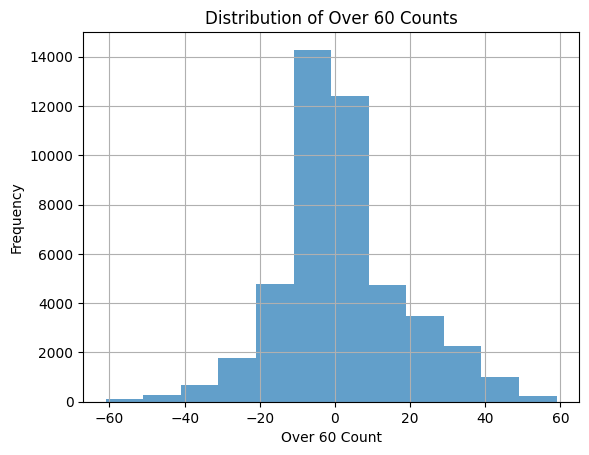

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'over_60' is the column with counts
credit_grouped['paid_pastdue_diff'].plot(kind='hist', bins=12, alpha=0.7)

plt.title('Distribution of Over 60 Counts')
plt.xlabel('Over 60 Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
credit_grouped[(credit_grouped['less_60'] >=credit_grouped['over_60']) & (credit_grouped['paid_pastdue_diff'] >= -5)]

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months,over_60,less_60,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,3,3,-3
5001712,10,0,0,0,0,0,9,0,19,0,10,10,-1
5001713,0,0,0,0,0,0,0,22,22,0,0,0,0
5001714,0,0,0,0,0,0,0,15,15,0,0,0,0
5001715,0,0,0,0,0,0,0,60,60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150480,6,0,0,0,0,0,20,0,26,0,6,6,14
5150481,0,0,0,0,0,0,0,43,43,0,0,0,0
5150483,0,0,0,0,0,0,0,18,18,0,0,0,0


In [ ]:
target=[]
for index,row in credit_grouped.iterrows() :
  if row['paid_pastdue_diff'] >0 or (row ['no_loan']==row['number_of_months']) :
    target.append(1)
  elif row['paid_pastdue_diff'] >= -5 and (row['over_60'] >=row['over_60']) :
    target.append(1)
  else:
    target.append(0)

credit_grouped['target']=target
credit_grouped['target'].value_counts()

1    30903
0    15082
Name: target, dtype: int64

In [ ]:
test = credit_grouped
target=[]
for index,row in test.iterrows() :
  if row['over_60'] >= 1 :
    target.append(1)
  else:
    target.append(0)

test['target']=target
test['target'].value_counts()

0    45318
1      667
Name: target, dtype: int64

# Merge Datasets

In [ ]:
#add labels to the dataframe
credit_ungrouped = credit_grouped.reset_index()

app_record_labelled = application_record_df.merge(credit_ungrouped[['ID','over_60', 'paid_pastdue_diff', 'number_of_months', 'target']], on='ID', how='inner')

In [ ]:
app_record_labelled.to_csv('application_record_relabelled.csv', index=False)

# Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('application_record_relabelled.csv')
df.info()

In [ ]:
df.describe()

In [ ]:
# Value counts for categorical columns
for col in df.select_dtypes(include=['category', 'object']).columns:
    print(df[col].value_counts())
    print()

## Visualisation for numerical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
# Trend of average income over age
trend_df = df.groupby('AGE')['AMT_INCOME_TOTAL'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=trend_df.index, y=trend_df.values)
plt.title('Average Income Trend Over Age')
plt.ylabel('Average Income')
plt.show()


In [ ]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Employment duration distribution
plt.figure(figsize=(8, 4))
sns.histplot(df[df['EMPLOYED']]['YEARS_EMPLOYED'], bins=30, kde=True)
plt.title('Employment Duration Distribution for Employed Individuals')
plt.show()


## Visualisation for categorical variables

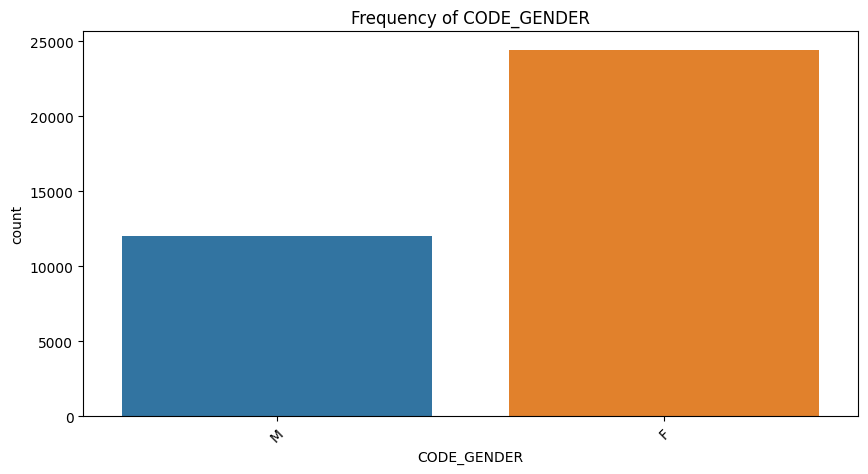

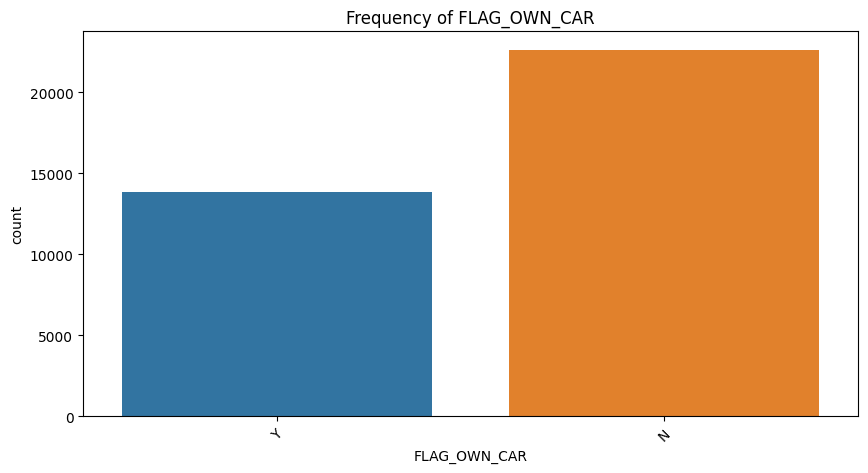

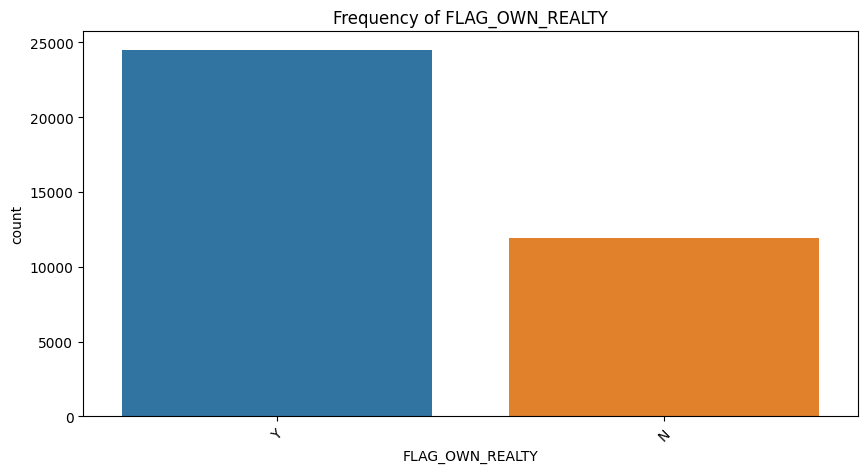

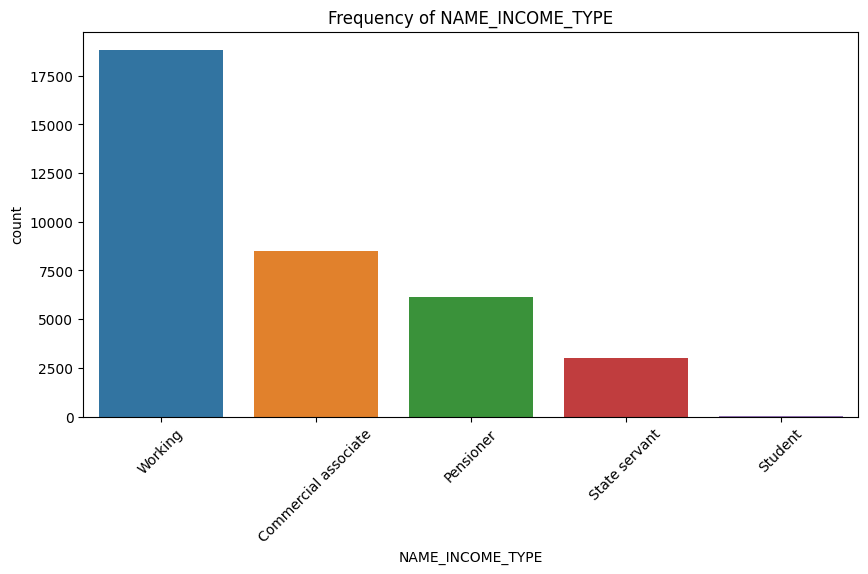

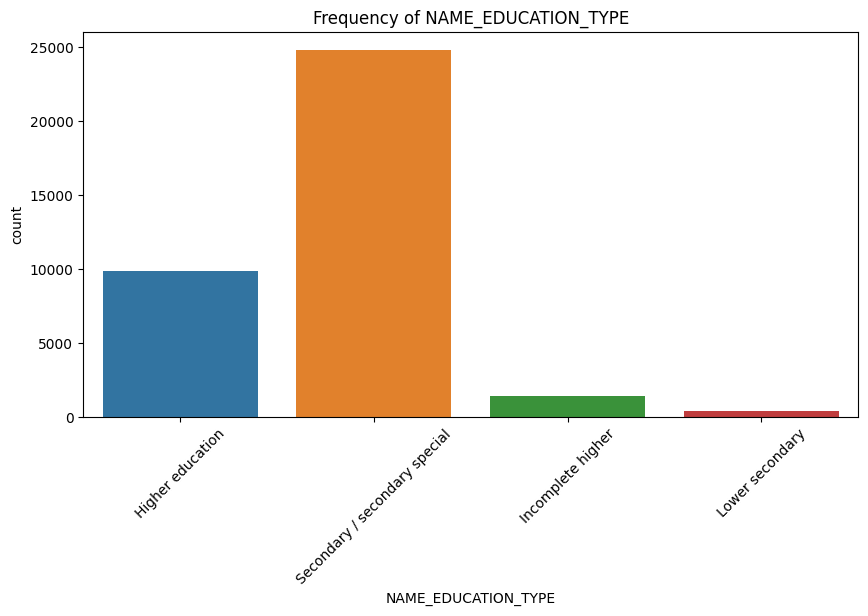

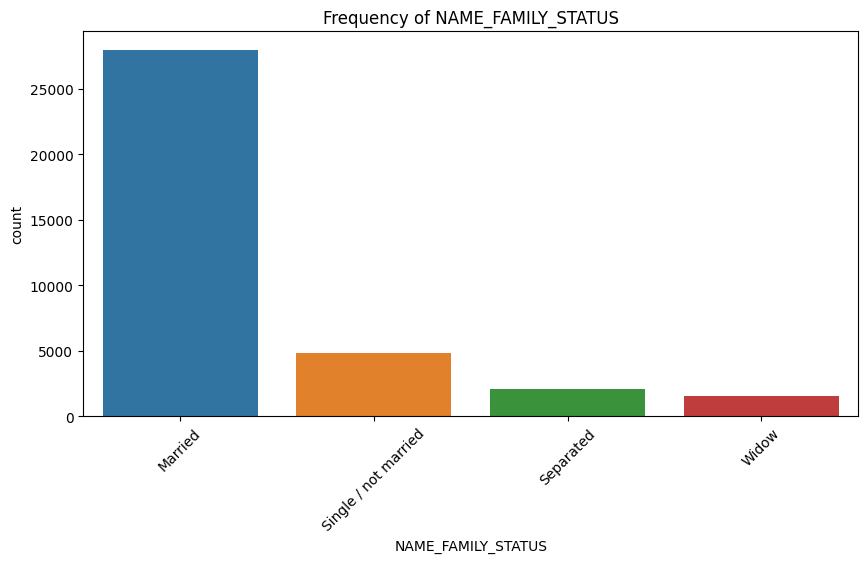

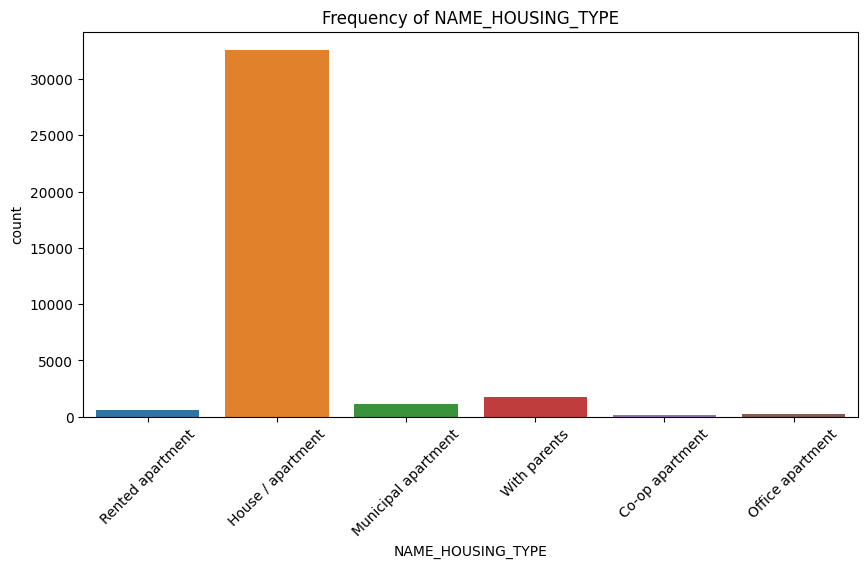

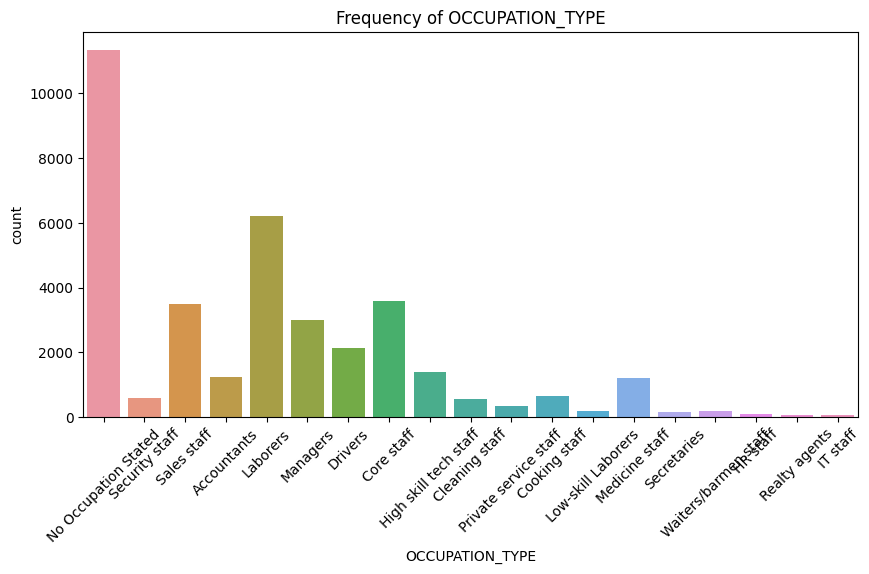

In [ ]:
# Bar charts for categorical variables
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Relationship with target variable

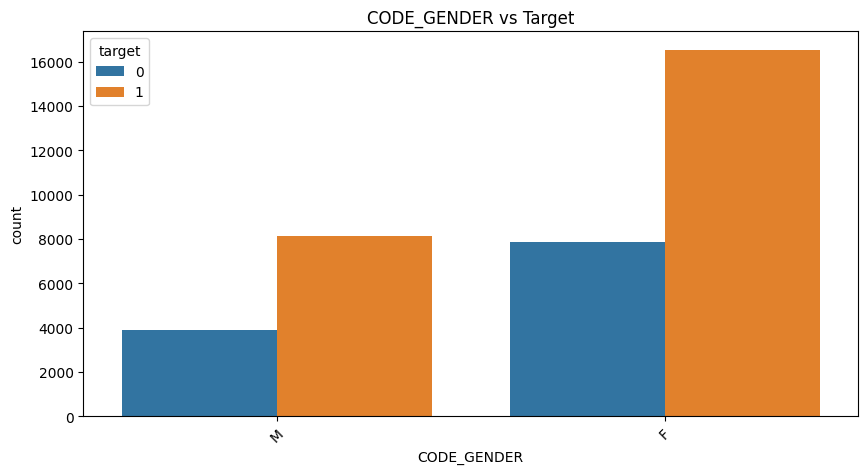

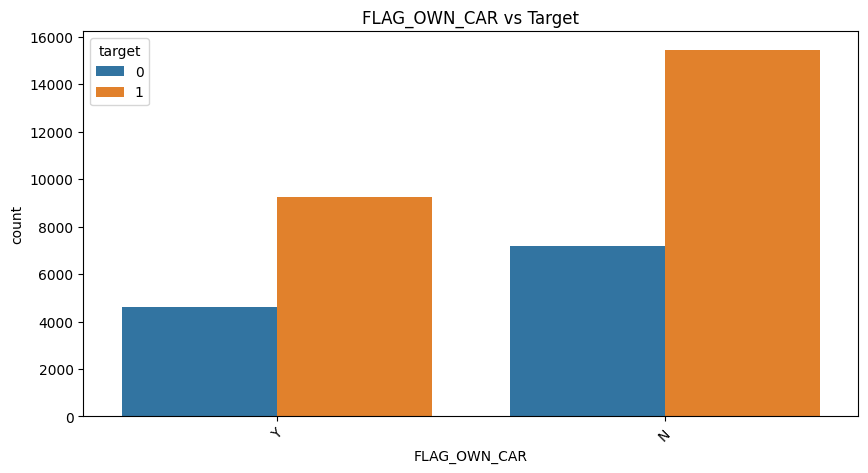

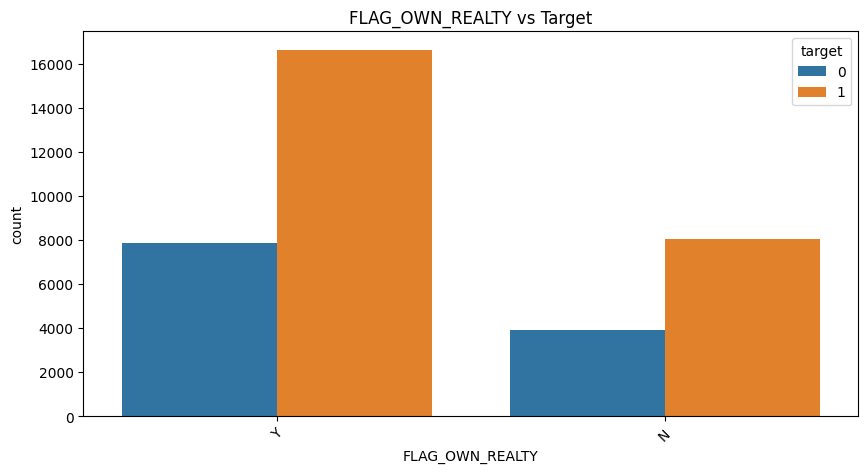

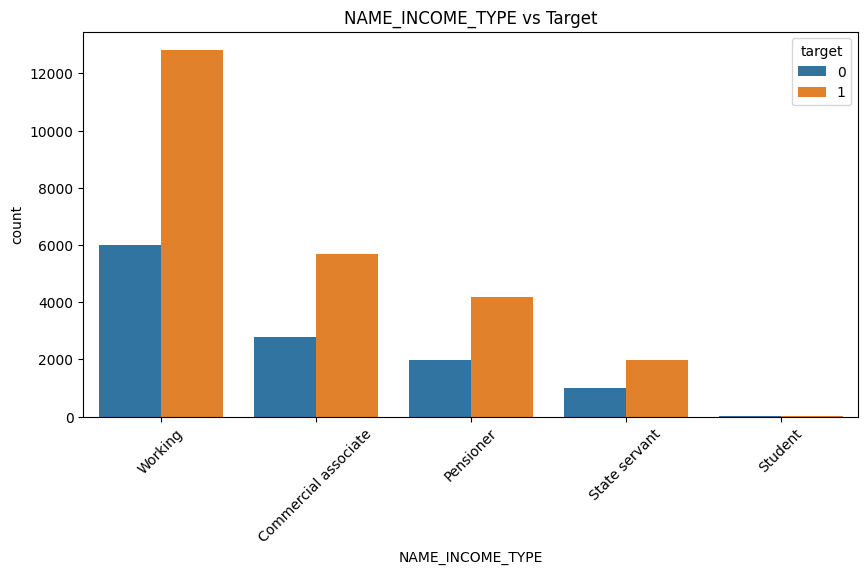

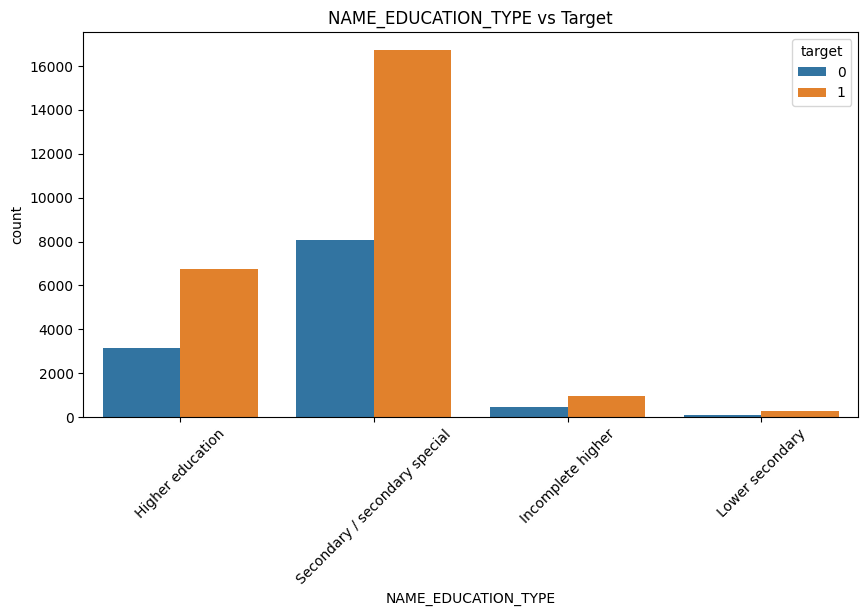

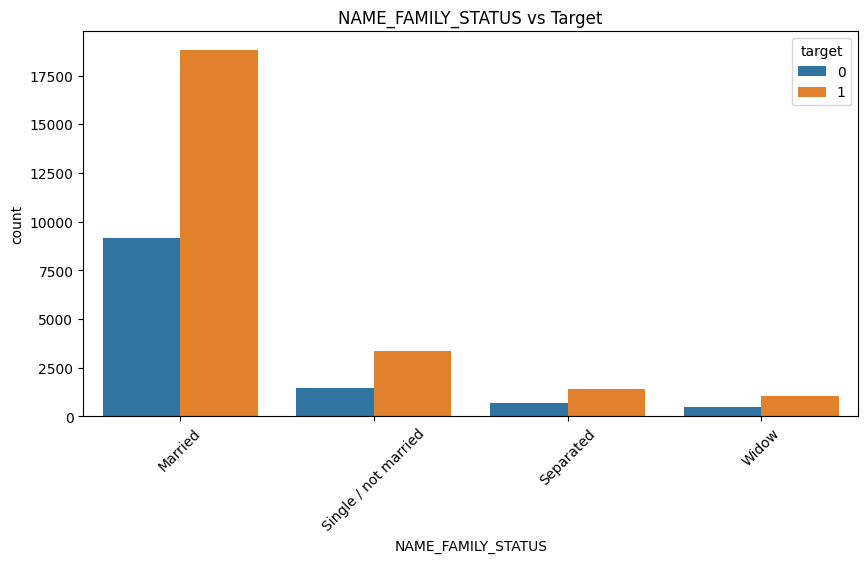

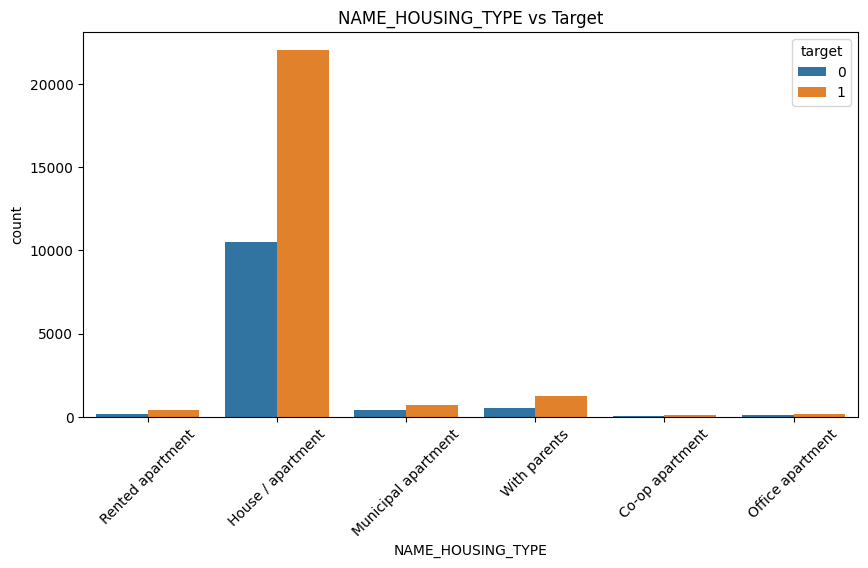

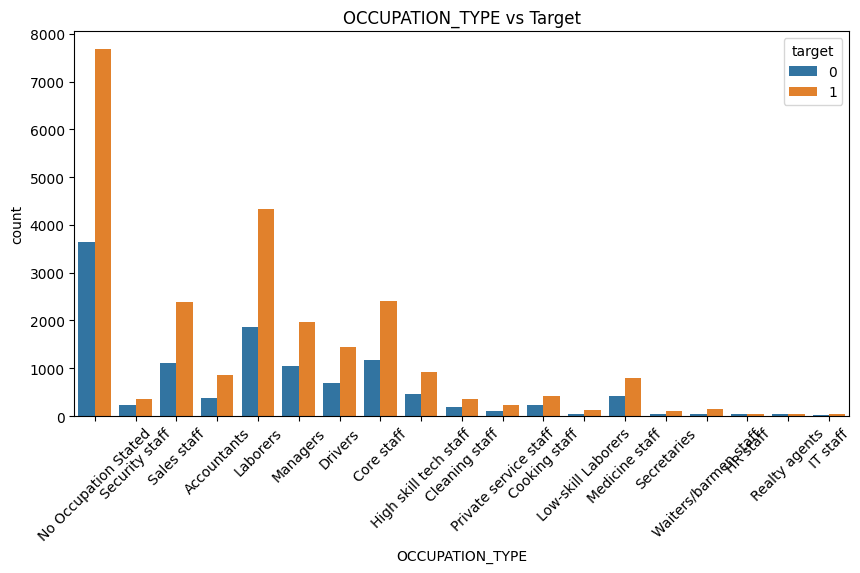

In [ ]:
# Analyzing relationship of categorical variables with target variable
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.show()


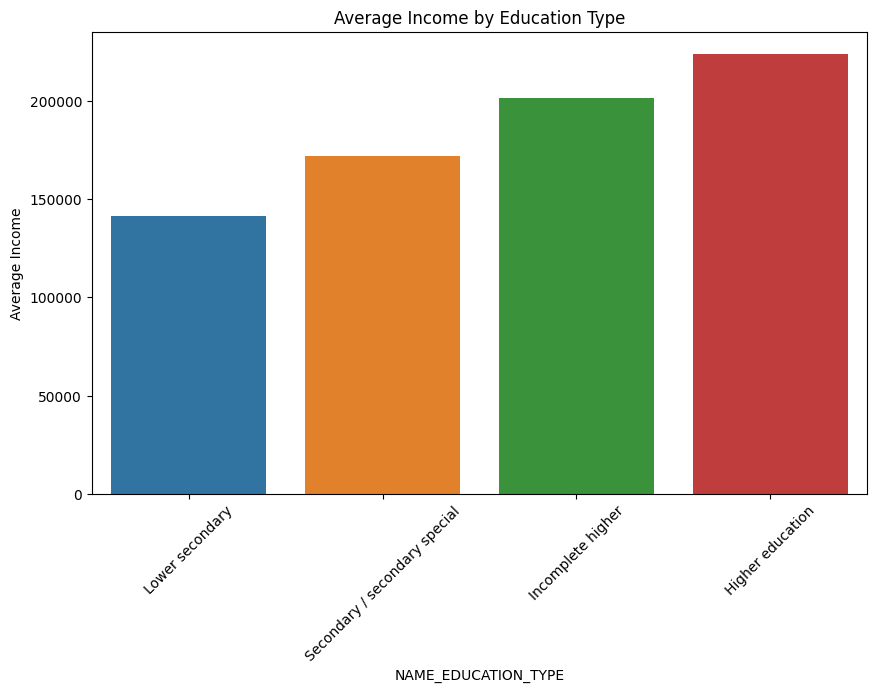

In [ ]:
# GroupBy operation
grouped_df = df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y=grouped_df.values)
plt.xticks(rotation=45)
plt.title('Average Income by Education Type')
plt.ylabel('Average Income')
plt.show()


<ipython-input-50-fe706ed928fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


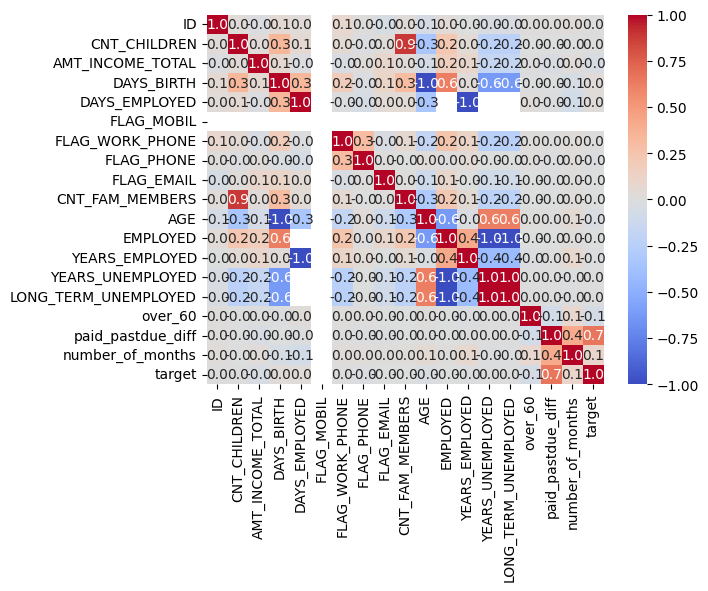

In [ ]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt = ".1f")
plt.show()

# Feature Processing

## Data Transformation

In [ ]:
df = pd.read_csv('application_record_relabelled.csv')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('No Occupation Stated')

reduced_lab_df = df

In [ ]:
reduced_lab_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,AGE,EMPLOYED,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,2.0,32.890411,True,12.443836,0.0,0,0,11,16,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,2.0,32.890411,True,12.443836,0.0,0,0,10,15,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2.0,58.832877,True,3.106849,0.0,0,0,0,30,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,52.356164,True,8.358904,0.0,0,0,-2,5,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,52.356164,True,8.358904,0.0,0,0,0,5,1


In [ ]:
reduced_lab_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,30322.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.00000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,-2645.503694,1.0,0.225526,0.294813,0.089722,2.198453,43.767598,6.028266,168.392473,0.16828,0.077571,0.749019,21.332392,0.677044
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,2357.407681,0.0,0.417934,0.455965,0.285787,0.911686,11.508356,6.484375,374.369337,0.37412,1.061999,15.609420,14.911849,0.467612
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,20.517808,0.000000,0.000000,0.00000,0.000000,-61.000000,1.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3505.000000,1.0,0.000000,0.000000,0.000000,2.000000,34.142466,1.117808,0.000000,0.00000,0.000000,-8.000000,9.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1992.000000,1.0,0.000000,0.000000,0.000000,2.000000,42.638356,4.252055,0.000000,0.00000,0.000000,-1.000000,18.000000,1.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-978.000000,1.0,0.000000,1.000000,0.000000,3.000000,53.254795,8.638356,0.000000,0.00000,0.000000,8.000000,31.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,-17.000000,1.0,1.000000,1.000000,1.000000,20.000000,68.909589,43.049315,1000.665753,1.00000,48.000000,59.000000,61.000000,1.000000


### Round off

In [ ]:
# round off AMT_INCOME_TOTAL
reduced_lab_df['AMT_INCOME_TOTAL'] = reduced_lab_df['AMT_INCOME_TOTAL'].round()

# round off AGE
reduced_lab_df['AGE'] = reduced_lab_df['AGE'].round()

### Remove outliers
From the boxplots and histograms of the variables, we observe possible outliers. Hence, we will remove them to ensure that they do not affect the performance of our models later.


Average number of children in a family is about 2.4, while average number of family members is about 3.1. Taking these into consideration, we will remove those with more than 5 children or 7 family members.

In [ ]:
len(reduced_lab_df.loc[reduced_lab_df['CNT_CHILDREN'] > 5])

6

In [ ]:
len(reduced_lab_df.loc[reduced_lab_df['CNT_FAM_MEMBERS'] > 7])

6

In [ ]:
# Based on boxplots, remove outliers for CNT_CHILDREN >= 5 and CNT_FAM_MEMBERS >= 7
reduced_lab_df = reduced_lab_df.loc[reduced_lab_df['CNT_CHILDREN'] <= 5]
reduced_lab_df = reduced_lab_df.loc[reduced_lab_df['CNT_FAM_MEMBERS'] <= 7]

In [ ]:
# handle outliers for AMT_INCOME_TOTAL and YEARS_EMPLOYED
## 5th to 95th percentile
total_income = reduced_lab_df['AMT_INCOME_TOTAL']
a = np.percentile(total_income, 5, axis = 0)
b = np.percentile(total_income, 95, axis = 0)

reduced_lab_df['AMT_INCOME_TOTAL'].mask(reduced_lab_df['AMT_INCOME_TOTAL'] > b, b, inplace=True)
reduced_lab_df['AMT_INCOME_TOTAL'].mask(reduced_lab_df['AMT_INCOME_TOTAL'] < a, a, inplace=True)

years_employed = reduced_lab_df['YEARS_EMPLOYED']
c = np.percentile(years_employed, 5, axis = 0)
d = np.percentile(years_employed, 95, axis = 0)

reduced_lab_df['YEARS_EMPLOYED'].mask(reduced_lab_df['YEARS_EMPLOYED'] > d, d, inplace=True)
reduced_lab_df['YEARS_EMPLOYED'].mask(reduced_lab_df['YEARS_EMPLOYED'] < c, c, inplace=True)

In [ ]:
reduced_lab_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target
count,3.645100e+04,36451.000000,36451.000000,36451.000000,30316.000000,36451.0,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000
mean,5.078225e+06,0.428328,181305.395654,-15975.279773,-2645.690230,1.0,0.225481,0.294779,0.089737,2.196538,43.777647,5.743217,168.420191,0.168308,0.077584,0.751749,21.331431,0.677101
std,4.187711e+04,0.724024,78084.403513,4200.755532,2357.603464,0.0,0.417904,0.455950,0.285808,0.898100,11.519756,5.585364,374.393913,0.374145,1.062086,15.607708,14.910913,0.467591
min,5.008804e+06,0.000000,76500.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,-61.000000,1.000000,0.000000
25%,5.042026e+06,0.000000,121500.000000,-19438.000000,-3505.000000,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,1.117808,0.000000,0.000000,0.000000,-8.000000,9.000000,0.000000
50%,5.074614e+06,0.000000,157500.000000,-15563.000000,-1992.000000,1.0,0.000000,0.000000,0.000000,2.000000,43.000000,4.252055,0.000000,0.000000,0.000000,-1.000000,18.000000,1.000000
75%,5.115396e+06,1.000000,225000.000000,-12461.500000,-978.000000,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,8.638356,0.000000,0.000000,0.000000,8.000000,31.000000,1.000000
max,5.150487e+06,5.000000,360000.000000,-7489.000000,-17.000000,1.0,1.000000,1.000000,1.000000,7.000000,69.000000,19.739726,1000.665753,1.000000,48.000000,59.000000,61.000000,1.000000


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols_label = ['FLAG_OWN_CAR', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'EMPLOYED']

for i in categorical_cols_label:
  label_encoder = LabelEncoder()
  reduced_lab_df[i] = label_encoder.fit_transform(reduced_lab_df[i])
  mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
  print(i)
  print( dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

FLAG_OWN_CAR
{'N': 0, 'Y': 1}
CODE_GENDER
{'F': 0, 'M': 1}
FLAG_OWN_REALTY
{'N': 0, 'Y': 1}
EMPLOYED
{False: 0, True: 1}


#### One Hot Encoding
NAME_FAMILY_STATUS to MARRIAGE_STATUS, Married - 1, Others - 0

In [ ]:
reduced_lab_df['NAME_FAMILY_STATUS'].value_counts()

Married                 27991
Single / not married     4828
Separated                2100
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
reduced_lab_df['MARRIAGE_STATUS'] = reduced_lab_df['NAME_FAMILY_STATUS'].replace({'Married': 1, 'Single / not married' : 0, 'Separated' : 2, 'Widow' : 2})

Based on the counts below, we observe that customers labelled with income type 'pensioner' could be both employed and unemployed.

In [ ]:
reduced_lab_df['NAME_INCOME_TYPE'].value_counts()

Working                 18813
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
temp_df = reduced_lab_df[['NAME_INCOME_TYPE','EMPLOYED']]
temp_df = temp_df.join(temp_df.groupby(['NAME_INCOME_TYPE','EMPLOYED'])
              .size()
              .unstack(fill_value=0), on='NAME_INCOME_TYPE' )
temp_df

,NAME_INCOME_TYPE,EMPLOYED,0,1
0,Working,1,0,18813
1,Working,1,0,18813
2,Working,1,0,18813
3,Commercial associate,1,0,8490
4,Commercial associate,1,0,8490
...,...,...,...,...
36452,Working,1,0,18813
36453,Commercial associate,1,0,8490
36454,Pensioner,1,6135,17
36455,Working,1,0,18813


There are pensioners (=17) who are employed. We will disregard this since it is only a small proportion.

#### Ordinal Encoding
NAME_EDUCATION_TYPE, WAY_OF_LIVING

In [ ]:
education_order = {'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2, 'Higher education': 3}
reduced_lab_df['EDUCATION'] = reduced_lab_df['NAME_EDUCATION_TYPE'].map(education_order)

reduced_lab_df = reduced_lab_df.drop('NAME_EDUCATION_TYPE', axis = 1)

In [ ]:
# With parents: most financially advantageous option, significant savings
# Co-op: costs are shared among residents
# Municipal apartment: Government-subsidized, offer more stability in terms of rent
# Rented apartment: rental prices may increase over time
# Office apartment: not be a typical or sustainable long-term residential option
# House (Owned): upfront costs and ongoing expenses, substantial mortgage payments, property taxes, and maintenance costs

housing_order = {'With parents': 0, 'Co-op apartment': 1, 'Municipal apartment': 2, 'Rented apartment': 3, 'Office apartment': 4, 'House / apartment': 5}
reduced_lab_df['WAY_OF_LIVING'] = reduced_lab_df['NAME_HOUSING_TYPE'].map(housing_order)

reduced_lab_df = reduced_lab_df.drop('NAME_HOUSING_TYPE', axis = 1)
reduced_lab_df.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target,MARRIAGE_STATUS,EDUCATION,WAY_OF_LIVING
count,3.645100e+04,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,30316.000000,36451.0,36451.000000,...,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000,36451.000000
mean,5.078225e+06,0.329867,0.379688,0.672190,0.428328,181305.395654,-15975.279773,-2645.690230,1.0,0.225481,...,5.743217,168.420191,0.168308,0.077584,0.751749,21.331431,0.677101,0.967189,1.571397,4.606376
std,4.187711e+04,0.470171,0.485316,0.469422,0.724024,78084.403513,4200.755532,2357.603464,0.0,0.417904,...,5.585364,374.393913,0.374145,1.062086,15.607708,14.910913,0.467591,0.480648,0.899122,1.218899
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,76500.000000,-25152.000000,-15713.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-61.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042026e+06,0.000000,0.000000,0.000000,0.000000,121500.000000,-19438.000000,-3505.000000,1.0,0.000000,...,1.117808,0.000000,0.000000,0.000000,-8.000000,9.000000,0.000000,1.000000,1.000000,5.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,157500.000000,-15563.000000,-1992.000000,1.0,0.000000,...,4.252055,0.000000,0.000000,0.000000,-1.000000,18.000000,1.000000,1.000000,1.000000,5.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,225000.000000,-12461.500000,-978.000000,1.0,0.000000,...,8.638356,0.000000,0.000000,0.000000,8.000000,31.000000,1.000000,1.000000,3.000000,5.000000
max,5.150487e+06,1.000000,1.000000,1.000000,5.000000,360000.000000,-7489.000000,-17.000000,1.0,1.000000,...,19.739726,1000.665753,1.000000,48.000000,59.000000,61.000000,1.000000,2.000000,3.000000,5.000000


## Remove columns

In [ ]:
# remove DAYS_BIRTH, DAYS_EMPLOYED
reduced_lab_df = reduced_lab_df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE'], axis = 1)

Checking unique values of FLAG_MOBIL shows that it has only 1 value, which means everyone owns a mobile phone. Hence, we will remove FLAG_MOBIL to reduce dimensionality.

In [ ]:
print(pd.unique(df[['FLAG_MOBIL']].values.ravel()))
reduced_lab_df = reduced_lab_df.drop('FLAG_MOBIL', axis= 1)

[1]


In [ ]:
reduced_lab_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,...,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target,MARRIAGE_STATUS,EDUCATION,WAY_OF_LIVING
0,5008804,1,1,1,0,360000.0,1,0,0,No Occupation Stated,...,12.443836,0.0,0,0,11,16,1,1,3,3
1,5008805,1,1,1,0,360000.0,1,0,0,No Occupation Stated,...,12.443836,0.0,0,0,10,15,1,1,3,3
2,5008806,1,1,1,0,112500.0,0,0,0,Security staff,...,3.106849,0.0,0,0,0,30,1,1,1,5
3,5008808,0,0,1,0,270000.0,0,1,1,Sales staff,...,8.358904,0.0,0,0,-2,5,1,0,1,5
4,5008809,0,0,1,0,270000.0,0,1,1,Sales staff,...,8.358904,0.0,0,0,0,5,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,0,0,0,Managers,...,6.630137,0.0,0,4,-4,12,1,1,1,5
36453,5149834,0,0,1,0,157500.0,0,1,1,Medicine staff,...,3.630137,0.0,0,11,-14,24,0,1,3,5
36454,5149838,0,0,1,0,157500.0,0,1,1,Medicine staff,...,3.630137,0.0,0,11,-5,33,1,1,3,5
36455,5150049,0,0,1,0,283500.0,0,0,0,Sales staff,...,1.794521,0.0,0,1,-10,10,0,1,1,5


In [ ]:
reduced_lab_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,...,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target,MARRIAGE_STATUS,EDUCATION,WAY_OF_LIVING
0,5008804,1,1,1,0,360000.0,1,0,0,No Occupation Stated,...,12.443836,0.0,0,0,11,16,1,1,3,3
1,5008805,1,1,1,0,360000.0,1,0,0,No Occupation Stated,...,12.443836,0.0,0,0,10,15,1,1,3,3
2,5008806,1,1,1,0,112500.0,0,0,0,Security staff,...,3.106849,0.0,0,0,0,30,1,1,1,5
3,5008808,0,0,1,0,270000.0,0,1,1,Sales staff,...,8.358904,0.0,0,0,-2,5,1,0,1,5
4,5008809,0,0,1,0,270000.0,0,1,1,Sales staff,...,8.358904,0.0,0,0,0,5,1,0,1,5


In [ ]:
reduced_lab_df.to_csv('app_relabelled_cleaned.csv', index=False)

In [ ]:
reduced_lab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36451 entries, 0 to 36456
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    36451 non-null  int64  
 1   CODE_GENDER           36451 non-null  int64  
 2   FLAG_OWN_CAR          36451 non-null  int64  
 3   FLAG_OWN_REALTY       36451 non-null  int64  
 4   CNT_CHILDREN          36451 non-null  int64  
 5   AMT_INCOME_TOTAL      36451 non-null  float64
 6   FLAG_WORK_PHONE       36451 non-null  int64  
 7   FLAG_PHONE            36451 non-null  int64  
 8   FLAG_EMAIL            36451 non-null  int64  
 9   OCCUPATION_TYPE       36451 non-null  object 
 10  CNT_FAM_MEMBERS       36451 non-null  float64
 11  AGE                   36451 non-null  float64
 12  EMPLOYED              36451 non-null  int64  
 13  YEARS_EMPLOYED        36451 non-null  float64
 14  YEARS_UNEMPLOYED      36451 non-null  float64
 15  LONG_TERM_UNEMPLOYE